## Preliminary Results
---

In [1]:
import crowded.method as cr
import crowded.iterate as ci

import sys
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

## Predefined Parameters
---

In [2]:
total_tasks = 100
total_workers = 40
p_hard_t = 0.1
p_good_w = 0.9
answers_key = ["liver", "blood", "lung", "brain", "heart"]
p_train_t = 0.4
workers_per_task = 7

In [2]:
ci.Iterate('total_tasks').get_accuracy()

0.79285714285714293

In [3]:
ci.Iterate('total_tasks').get_proportion()

0.21

---
## Change one variable, Fixed all the rest variables

In [3]:
results = ci.Iterate('total_workers').train_workers()

In [2]:
df_simulations = ci.Iterate('workers_per_task').table(max_value=100, number_iterations = 5)

In [3]:
df_simulations

,workers_per_task,accuracy,simulation
0,0,0.846154,0
1,1,0.862745,0
2,2,0.846591,0
3,0,0.916667,1
4,1,0.868421,1
5,2,0.875000,1
6,3,0.873333,1
7,0,0.850000,2
8,1,0.933333,2
9,2,0.882353,2


In [81]:
def train_parameter(max_value):
    results = []
    #for idx, i in enumerate(np.arange(1, max_value, 1)): #for tasks and workers
    #for idx, i in enumerate(np.arange(3, max_value, 2)): #for tasks and workers
    for idx, i in enumerate(np.arange(0, max_value, 0.01)): #for tasks and workers
        try:
            results.append((idx,
                           workers_algorithm(total_tasks = 100, #(0,1000) def 100
                                             total_workers = 50, #(0,1000) 50
                                             p_hard_tasks = 0.1, #(0,1) def .1
                                             p_good_workers = 0.9, #(0,1) def .9
                                             p_train_tasks = i + 0.1, #(0,1) def .5
                                             workers_per_task = 5))) #3,5,7,9,11,13,15 def 7
        except Exception:
            pass
    return results

In [82]:
#results = train_parameter(200)
#results

In [83]:
def simulations_df(max_value, variable, number_simulations = 10):
    startTime= dt.now()
    simulations = []
    for k in range(number_simulations):
        results = train_parameter(max_value)
        simulations.append((k, results))

    df_simulations = pd.DataFrame()
    vec_variable, vec_accuracy, vec_simulation = [], [], []
    for i in simulations:
        for j in i[1]:
            vec_variable.append(j[0])
            vec_accuracy.append(j[1])
            vec_simulation.append(i[0])

    df_simulations['variable'] = vec_variable
    df_simulations['accuracy'] = vec_accuracy
    df_simulations['simulation'] = vec_simulation
    
    df_simulations.to_csv('df_simulations'+str(variable)+str(max_value)+'.csv', sep=',', encoding="utf-8")
    
    timeElapsed = dt.now()-startTime
    print('Process (hh:mm:ss.ms) {}'.format(timeElapsed))
    
    return df_simulations, timeElapsed     

In [ ]:
#df_simulations.to_csv('df_simulations'+str(self.variable)+str(max_value)+'.csv', sep=',', encoding="utf-8")

In [84]:
#total_tasks
#df_simulations, timeElapsed = simulations_df(100, "total_tasks", 10)
#total_workers
#df_simulations, timeElapsed = simulations_df(100, "total_workers", 10)
#workers_per_task
#df_simulations, timeElapsed = simulations_df(99, "workers_per_task", 10)
#p_train_tasks
df_simulations, timeElapsed = simulations_df(1, "p_train_tasks", 10)

Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 10
Workers Trained: 35
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.89
Selected Best Workers: 4
Tasks already done 2 from the total of 100
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 11
Workers Trained: 31
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.85
Selected Best Workers: 11
Tasks already done 3 from the total of 100
Task consensus: 21 of 100
Accuracy Simulation: 0.21 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 12
Workers Trained: 34
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.83
Selected Best Workers: 11
Tasks already done 5 from the total of 100
Task consensus: 22 of 100
Accuracy Simulation: 0.22 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 13
Workers Trained: 39
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.85
Selected Best Workers: 8
Tasks already d

Task consensus: 21 of 100
Accuracy Simulation: 0.21 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 37
Workers Trained: 47
Cutoff for Performance: 0.189 
Cutoff for Probability: 0.85
Selected Best Workers: 14
Tasks already done 13 from the total of 100
Task consensus: 30 of 100
Accuracy Simulation: 0.3 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 38
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.9
Selected Best Workers: 11
Tasks already done 8 from the total of 100
Task consensus: 26 of 100
Accuracy Simulation: 0.26 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 39
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.835
Selected Best Workers: 12
Tasks already done 6 from the total of 100
Task consensus: 27 of 100
Accuracy Simulation: 0.27 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 40
Workers T

Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 64
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.86
Selected Best Workers: 8
Tasks already done 11 from the total of 100
Task consensus: 36 of 100
Accuracy Simulation: 0.36 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 65
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.86
Selected Best Workers: 15
Tasks already done 10 from the total of 100
Task consensus: 35 of 100
Accuracy Simulation: 0.35 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 66
Workers Trained: 50
Cutoff for Performance: 0.16 
Cutoff for Probability: 0.87
Selected Best Workers: 17
Tasks already done 16 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 67
Workers 

Task consensus: 37 of 100
Accuracy Simulation: 0.37 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 90
Workers Trained: 50
Cutoff for Performance: 0.137 
Cutoff for Probability: 0.845
Selected Best Workers: 18
Tasks already done 17 from the total of 100
Task consensus: 21 of 100
Accuracy Simulation: 0.21 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 91
Workers Trained: 50
Cutoff for Performance: 0.075 
Cutoff for Probability: 0.84
Selected Best Workers: 18
Tasks already done 12 from the total of 100
Task consensus: 26 of 100
Accuracy Simulation: 0.26 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 92
Workers Trained: 50
Cutoff for Performance: 0.16 
Cutoff for Probability: 0.85
Selected Best Workers: 17
Tasks already done 22 from the total of 100
Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 93
Wo

Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 24
Workers Trained: 46
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.865
Selected Best Workers: 15
Tasks already done 6 from the total of 100
Task consensus: 22 of 100
Accuracy Simulation: 0.22 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 25
Workers Trained: 45
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.85
Selected Best Workers: 9
Tasks already done 7 from the total of 100
Task consensus: 21 of 100
Accuracy Simulation: 0.21 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 26
Workers Trained: 49
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.87
Selected Best Workers: 11
Tasks already done 4 from the total of 100
Task consensus: 19 of 100
Accuracy Simulation: 0.19 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 27
Workers Tra

Task consensus: 23 of 100
Accuracy Simulation: 0.23 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 51
Workers Trained: 50
Cutoff for Performance: 0.167 
Cutoff for Probability: 0.885
Selected Best Workers: 16
Tasks already done 13 from the total of 100
Task consensus: 20 of 100
Accuracy Simulation: 0.2 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 52
Workers Trained: 49
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.88
Selected Best Workers: 16
Tasks already done 14 from the total of 100
Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 53
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.885
Selected Best Workers: 16
Tasks already done 11 from the total of 100
Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 54
Wor

Task consensus: 34 of 100
Accuracy Simulation: 0.34 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 77
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.825
Selected Best Workers: 16
Tasks already done 9 from the total of 100
Task consensus: 17 of 100
Accuracy Simulation: 0.17 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 78
Workers Trained: 50
Cutoff for Performance: 0.151 
Cutoff for Probability: 0.875
Selected Best Workers: 17
Tasks already done 19 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 79
Workers Trained: 50
Cutoff for Performance: 0.125 
Cutoff for Probability: 0.875
Selected Best Workers: 19
Tasks already done 16 from the total of 100
Task consensus: 23 of 100
Accuracy Simulation: 0.23 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 80
Wo

Task consensus: 22 of 100
Accuracy Simulation: 0.22 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 11
Workers Trained: 36
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.86
Selected Best Workers: 7
Tasks already done 3 from the total of 100
Task consensus: 19 of 100
Accuracy Simulation: 0.19 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 12
Workers Trained: 36
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.825
Selected Best Workers: 7
Tasks already done 3 from the total of 100
Task consensus: 22 of 100
Accuracy Simulation: 0.22 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 13
Workers Trained: 38
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.85
Selected Best Workers: 4
Tasks already done 2 from the total of 100
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 14
Workers Trained: 40
Cutoff for Performance: 0.0 
Cutoff for Probab

Task consensus: 31 of 100
Accuracy Simulation: 0.31 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 38
Workers Trained: 48
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.855
Selected Best Workers: 12
Tasks already done 9 from the total of 100
Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 39
Workers Trained: 50
Cutoff for Performance: 0.2 
Cutoff for Probability: 0.84
Selected Best Workers: 15
Tasks already done 12 from the total of 100
Task consensus: 32 of 100
Accuracy Simulation: 0.32 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 40
Workers Trained: 50
Cutoff for Performance: 0.16 
Cutoff for Probability: 0.85
Selected Best Workers: 15
Tasks already done 12 from the total of 100
Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 41
Workers

Task consensus: 38 of 100
Accuracy Simulation: 0.38 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 65
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.86
Selected Best Workers: 13
Tasks already done 16 from the total of 100
Task consensus: 34 of 100
Accuracy Simulation: 0.34 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 66
Workers Trained: 50
Cutoff for Performance: 0.125 
Cutoff for Probability: 0.845
Selected Best Workers: 17
Tasks already done 12 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 67
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.8
Selected Best Workers: 17
Tasks already done 11 from the total of 100
Task consensus: 28 of 100
Accuracy Simulation: 0.28 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 68
Work

Task consensus: 37 of 100
Accuracy Simulation: 0.37 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 91
Workers Trained: 50
Cutoff for Performance: 0.137 
Cutoff for Probability: 0.825
Selected Best Workers: 19
Tasks already done 17 from the total of 100
Task consensus: 22 of 100
Accuracy Simulation: 0.22 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 92
Workers Trained: 50
Cutoff for Performance: 0.2 
Cutoff for Probability: 0.865
Selected Best Workers: 13
Tasks already done 23 from the total of 100
Task consensus: 26 of 100
Accuracy Simulation: 0.26 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 93
Workers Trained: 50
Cutoff for Performance: 0.2 
Cutoff for Probability: 0.855
Selected Best Workers: 16
Tasks already done 25 from the total of 100
Task consensus: 45 of 100
Accuracy Simulation: 0.45 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 94
Wor

Task consensus: 27 of 100
Accuracy Simulation: 0.27 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 25
Workers Trained: 45
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.84
Selected Best Workers: 5
Tasks already done 3 from the total of 100
Task consensus: 30 of 100
Accuracy Simulation: 0.3 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 26
Workers Trained: 48
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.875
Selected Best Workers: 18
Tasks already done 8 from the total of 100
Task consensus: 27 of 100
Accuracy Simulation: 0.27 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 27
Workers Trained: 45
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.83
Selected Best Workers: 8
Tasks already done 5 from the total of 100
Task consensus: 26 of 100
Accuracy Simulation: 0.26 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 28
Workers Train

Task consensus: 37 of 100
Accuracy Simulation: 0.37 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 52
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.86
Selected Best Workers: 16
Tasks already done 10 from the total of 100
Task consensus: 30 of 100
Accuracy Simulation: 0.3 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 53
Workers Trained: 49
Cutoff for Performance: 0.25 
Cutoff for Probability: 0.85
Selected Best Workers: 14
Tasks already done 20 from the total of 100
Task consensus: 39 of 100
Accuracy Simulation: 0.39 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 54
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.825
Selected Best Workers: 15
Tasks already done 15 from the total of 100
Task consensus: 27 of 100
Accuracy Simulation: 0.27 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 55
Worke

Task consensus: 21 of 100
Accuracy Simulation: 0.21 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 78
Workers Trained: 50
Cutoff for Performance: 0.125 
Cutoff for Probability: 0.84
Selected Best Workers: 19
Tasks already done 15 from the total of 100
Task consensus: 33 of 100
Accuracy Simulation: 0.33 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 79
Workers Trained: 50
Cutoff for Performance: 0.222 
Cutoff for Probability: 0.865
Selected Best Workers: 17
Tasks already done 25 from the total of 100
Task consensus: 41 of 100
Accuracy Simulation: 0.41 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 80
Workers Trained: 50
Cutoff for Performance: 0.125 
Cutoff for Probability: 0.86
Selected Best Workers: 19
Tasks already done 15 from the total of 100
Task consensus: 34 of 100
Accuracy Simulation: 0.34 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 81
W

Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 12
Workers Trained: 32
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.845
Selected Best Workers: 7
Tasks already done 3 from the total of 100
Task consensus: 21 of 100
Accuracy Simulation: 0.21 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 13
Workers Trained: 35
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.84
Selected Best Workers: 5
Tasks already done 3 from the total of 100
Task consensus: 27 of 100
Accuracy Simulation: 0.27 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 14
Workers Trained: 37
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.86
Selected Best Workers: 9
Tasks already done 5 from the total of 100
Task consensus: 19 of 100
Accuracy Simulation: 0.19 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 15
Workers Train

Task consensus: 30 of 100
Accuracy Simulation: 0.3 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 39
Workers Trained: 48
Cutoff for Performance: 0.012 
Cutoff for Probability: 0.855
Selected Best Workers: 17
Tasks already done 11 from the total of 100
Task consensus: 34 of 100
Accuracy Simulation: 0.34 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 40
Workers Trained: 49
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.88
Selected Best Workers: 8
Tasks already done 5 from the total of 100
Task consensus: 33 of 100
Accuracy Simulation: 0.33 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 41
Workers Trained: 49
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.87
Selected Best Workers: 18
Tasks already done 8 from the total of 100
Task consensus: 20 of 100
Accuracy Simulation: 0.2 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 42
Workers Tr

Task consensus: 30 of 100
Accuracy Simulation: 0.3 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 66
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.88
Selected Best Workers: 18
Tasks already done 16 from the total of 100
Task consensus: 31 of 100
Accuracy Simulation: 0.31 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 67
Workers Trained: 50
Cutoff for Performance: 0.108 
Cutoff for Probability: 0.845
Selected Best Workers: 17
Tasks already done 12 from the total of 100
Task consensus: 31 of 100
Accuracy Simulation: 0.31 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 68
Workers Trained: 50
Cutoff for Performance: 0.111 
Cutoff for Probability: 0.83
Selected Best Workers: 16
Tasks already done 14 from the total of 100
Task consensus: 29 of 100
Accuracy Simulation: 0.29 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 69
Wo

Task consensus: 38 of 100
Accuracy Simulation: 0.38 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 92
Workers Trained: 50
Cutoff for Performance: 0.121 
Cutoff for Probability: 0.865
Selected Best Workers: 19
Tasks already done 20 from the total of 100
Task consensus: 43 of 100
Accuracy Simulation: 0.43 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 93
Workers Trained: 50
Cutoff for Performance: 0.16 
Cutoff for Probability: 0.86
Selected Best Workers: 18
Tasks already done 22 from the total of 100
Task consensus: 40 of 100
Accuracy Simulation: 0.4 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 94
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.845
Selected Best Workers: 17
Tasks already done 19 from the total of 100
Task consensus: 42 of 100
Accuracy Simulation: 0.42 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 95
Wo

Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 26
Workers Trained: 47
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.89
Selected Best Workers: 7
Tasks already done 5 from the total of 100
Task consensus: 26 of 100
Accuracy Simulation: 0.26 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 27
Workers Trained: 48
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.9
Selected Best Workers: 13
Tasks already done 8 from the total of 100
Task consensus: 32 of 100
Accuracy Simulation: 0.32 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 28
Workers Trained: 45
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.86
Selected Best Workers: 6
Tasks already done 4 from the total of 100
Task consensus: 20 of 100
Accuracy Simulation: 0.2 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 29
Workers Trained

Task consensus: 32 of 100
Accuracy Simulation: 0.32 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 53
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.865
Selected Best Workers: 13
Tasks already done 10 from the total of 100
Task consensus: 32 of 100
Accuracy Simulation: 0.32 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 54
Workers Trained: 49
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.87
Selected Best Workers: 16
Tasks already done 7 from the total of 100
Task consensus: 13 of 100
Accuracy Simulation: 0.13 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 55
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.865
Selected Best Workers: 15
Tasks already done 11 from the total of 100
Task consensus: 28 of 100
Accuracy Simulation: 0.28 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 56
Workers

Task consensus: 38 of 100
Accuracy Simulation: 0.38 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 79
Workers Trained: 50
Cutoff for Performance: 0.125 
Cutoff for Probability: 0.85
Selected Best Workers: 16
Tasks already done 17 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 80
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.875
Selected Best Workers: 16
Tasks already done 17 from the total of 100
Task consensus: 38 of 100
Accuracy Simulation: 0.38 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 81
Workers Trained: 50
Cutoff for Performance: 0.163 
Cutoff for Probability: 0.87
Selected Best Workers: 17
Tasks already done 18 from the total of 100
Task consensus: 40 of 100
Accuracy Simulation: 0.4 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 82
Wo

Task consensus: 33 of 100
Accuracy Simulation: 0.33 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 12
Workers Trained: 41
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.88
Selected Best Workers: 8
Tasks already done 3 from the total of 100
Task consensus: 22 of 100
Accuracy Simulation: 0.22 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 13
Workers Trained: 37
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.86
Selected Best Workers: 6
Tasks already done 3 from the total of 100
Task consensus: 19 of 100
Accuracy Simulation: 0.19 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 14
Workers Trained: 40
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.83
Selected Best Workers: 5
Tasks already done 2 from the total of 100
Task consensus: 27 of 100
Accuracy Simulation: 0.27 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 15
Workers Traine

Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 39
Workers Trained: 50
Cutoff for Performance: 0.117 
Cutoff for Probability: 0.865
Selected Best Workers: 19
Tasks already done 12 from the total of 100
Task consensus: 26 of 100
Accuracy Simulation: 0.26 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 40
Workers Trained: 48
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.865
Selected Best Workers: 14
Tasks already done 7 from the total of 100
Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 41
Workers Trained: 49
Cutoff for Performance: 0.167 
Cutoff for Probability: 0.86
Selected Best Workers: 17
Tasks already done 12 from the total of 100
Task consensus: 28 of 100
Accuracy Simulation: 0.28 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 42
Wor

Task consensus: 35 of 100
Accuracy Simulation: 0.35 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 66
Workers Trained: 50
Cutoff for Performance: 0.137 
Cutoff for Probability: 0.86
Selected Best Workers: 20
Tasks already done 14 from the total of 100
Task consensus: 35 of 100
Accuracy Simulation: 0.35 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 67
Workers Trained: 48
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.84
Selected Best Workers: 11
Tasks already done 15 from the total of 100
Task consensus: 38 of 100
Accuracy Simulation: 0.38 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 68
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.865
Selected Best Workers: 18
Tasks already done 13 from the total of 100
Task consensus: 37 of 100
Accuracy Simulation: 0.37 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 69
W

Task consensus: 29 of 100
Accuracy Simulation: 0.29 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 92
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.86
Selected Best Workers: 17
Tasks already done 19 from the total of 100
Task consensus: 39 of 100
Accuracy Simulation: 0.39 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 93
Workers Trained: 50
Cutoff for Performance: 0.125 
Cutoff for Probability: 0.85
Selected Best Workers: 18
Tasks already done 19 from the total of 100
Task consensus: 37 of 100
Accuracy Simulation: 0.37 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 94
Workers Trained: 50
Cutoff for Performance: 0.108 
Cutoff for Probability: 0.86
Selected Best Workers: 18
Tasks already done 17 from the total of 100
Task consensus: 43 of 100
Accuracy Simulation: 0.43 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 95
Wo

Task consensus: 19 of 100
Accuracy Simulation: 0.19 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 26
Workers Trained: 44
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.855
Selected Best Workers: 8
Tasks already done 3 from the total of 100
Task consensus: 22 of 100
Accuracy Simulation: 0.22 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 27
Workers Trained: 48
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.865
Selected Best Workers: 11
Tasks already done 5 from the total of 100
Task consensus: 22 of 100
Accuracy Simulation: 0.22 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 28
Workers Trained: 48
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.87
Selected Best Workers: 12
Tasks already done 11 from the total of 100
Task consensus: 35 of 100
Accuracy Simulation: 0.35 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 29
Workers T

Task consensus: 27 of 100
Accuracy Simulation: 0.27 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 53
Workers Trained: 50
Cutoff for Performance: 0.07 
Cutoff for Probability: 0.865
Selected Best Workers: 18
Tasks already done 9 from the total of 100
Task consensus: 15 of 100
Accuracy Simulation: 0.15 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 54
Workers Trained: 50
Cutoff for Performance: 0.16 
Cutoff for Probability: 0.855
Selected Best Workers: 19
Tasks already done 10 from the total of 100
Task consensus: 33 of 100
Accuracy Simulation: 0.33 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 55
Workers Trained: 50
Cutoff for Performance: 0.195 
Cutoff for Probability: 0.835
Selected Best Workers: 17
Tasks already done 16 from the total of 100
Task consensus: 23 of 100
Accuracy Simulation: 0.23 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 56
Wo

Task consensus: 36 of 100
Accuracy Simulation: 0.36 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 79
Workers Trained: 50
Cutoff for Performance: 0.125 
Cutoff for Probability: 0.865
Selected Best Workers: 18
Tasks already done 19 from the total of 100
Task consensus: 39 of 100
Accuracy Simulation: 0.39 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 80
Workers Trained: 50
Cutoff for Performance: 0.121 
Cutoff for Probability: 0.845
Selected Best Workers: 20
Tasks already done 17 from the total of 100
Task consensus: 21 of 100
Accuracy Simulation: 0.21 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 81
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.865
Selected Best Workers: 17
Tasks already done 11 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 82
W

Task consensus: 23 of 100
Accuracy Simulation: 0.23 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 12
Workers Trained: 40
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.85
Selected Best Workers: 5
Tasks already done 2 from the total of 100
Task consensus: 18 of 100
Accuracy Simulation: 0.18 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 13
Workers Trained: 38
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.845
Selected Best Workers: 6
Tasks already done 2 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 14
Workers Trained: 38
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.895
Selected Best Workers: 7
Tasks already done 3 from the total of 100
Task consensus: 14 of 100
Accuracy Simulation: 0.14 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 15
Workers Trai

Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 39
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.85
Selected Best Workers: 15
Tasks already done 9 from the total of 100
Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 40
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.865
Selected Best Workers: 13
Tasks already done 9 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 41
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.84
Selected Best Workers: 14
Tasks already done 7 from the total of 100
Task consensus: 28 of 100
Accuracy Simulation: 0.28 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 42
Workers Tr

Task consensus: 18 of 100
Accuracy Simulation: 0.18 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 66
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.83
Selected Best Workers: 15
Tasks already done 9 from the total of 100
Task consensus: 28 of 100
Accuracy Simulation: 0.28 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 67
Workers Trained: 50
Cutoff for Performance: 0.07 
Cutoff for Probability: 0.86
Selected Best Workers: 16
Tasks already done 8 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 68
Workers Trained: 50
Cutoff for Performance: 0.242 
Cutoff for Probability: 0.825
Selected Best Workers: 17
Tasks already done 22 from the total of 100
Task consensus: 29 of 100
Accuracy Simulation: 0.29 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 69
Worker

Task consensus: 41 of 100
Accuracy Simulation: 0.41 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 92
Workers Trained: 50
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.84
Selected Best Workers: 16
Tasks already done 10 from the total of 100
Task consensus: 34 of 100
Accuracy Simulation: 0.34 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 93
Workers Trained: 50
Cutoff for Performance: 0.246 
Cutoff for Probability: 0.81
Selected Best Workers: 19
Tasks already done 29 from the total of 100
Task consensus: 32 of 100
Accuracy Simulation: 0.32 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 94
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.875
Selected Best Workers: 16
Tasks already done 20 from the total of 100
Task consensus: 32 of 100
Accuracy Simulation: 0.32 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 95
Wor

Task consensus: 25 of 100
Accuracy Simulation: 0.25 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 26
Workers Trained: 46
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.84
Selected Best Workers: 9
Tasks already done 6 from the total of 100
Task consensus: 18 of 100
Accuracy Simulation: 0.18 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 27
Workers Trained: 47
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.85
Selected Best Workers: 12
Tasks already done 5 from the total of 100
Task consensus: 28 of 100
Accuracy Simulation: 0.28 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 28
Workers Trained: 47
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.86
Selected Best Workers: 13
Tasks already done 8 from the total of 100
Task consensus: 29 of 100
Accuracy Simulation: 0.29 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 29
Workers Trai

Task consensus: 20 of 100
Accuracy Simulation: 0.2 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 53
Workers Trained: 48
Cutoff for Performance: 0.0 
Cutoff for Probability: 0.85
Selected Best Workers: 15
Tasks already done 10 from the total of 100
Task consensus: 33 of 100
Accuracy Simulation: 0.33 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 54
Workers Trained: 49
Cutoff for Performance: 0.152 
Cutoff for Probability: 0.88
Selected Best Workers: 16
Tasks already done 11 from the total of 100
Task consensus: 24 of 100
Accuracy Simulation: 0.24 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 55
Workers Trained: 50
Cutoff for Performance: 0.143 
Cutoff for Probability: 0.88
Selected Best Workers: 16
Tasks already done 12 from the total of 100
Task consensus: 28 of 100
Accuracy Simulation: 0.28 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 56
Worke

Task consensus: 37 of 100
Accuracy Simulation: 0.37 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 80
Workers Trained: 50
Cutoff for Performance: 0.117 
Cutoff for Probability: 0.845
Selected Best Workers: 16
Tasks already done 18 from the total of 100
Task consensus: 40 of 100
Accuracy Simulation: 0.4 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 81
Workers Trained: 50
Cutoff for Performance: 0.125 
Cutoff for Probability: 0.83
Selected Best Workers: 9
Tasks already done 16 from the total of 100
Task consensus: 33 of 100
Accuracy Simulation: 0.33 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 82
Workers Trained: 50
Cutoff for Performance: 0.081 
Cutoff for Probability: 0.885
Selected Best Workers: 18
Tasks already done 14 from the total of 100
Task consensus: 31 of 100
Accuracy Simulation: 0.31 
Hard Tasks: 10 
Easy Tasks: 90
Good Workers: 45 
Poor Workers: 5
Tasks to train: 83
Wo

In [50]:
#df_simulations#.head()

In [85]:
print('Process with 100 iterations and 0-100 range of % to train(hh:mm:ss.ms) {}'.format(timeElapsed))

Process with 100 iterations and 0-100 range of % to train(hh:mm:ss.ms) 0:05:31.520586


In [86]:
#pd.read_csv('df_simulations.csv', sep=',', encoding="utf-8")

In [9]:
df_simulations.head()

,total_workers,accuracy,simulation
0,24,0.857143,0
1,29,0.700000,0
2,30,0.901786,0
3,31,0.871429,0
4,32,0.870130,0


In [4]:
accu = df_simulations.groupby('workers_per_task').mean()
#df_simulations.groupby('workers').std()

In [5]:
accu.sort_values('accuracy', ascending=False).head(10)['accuracy']

workers_per_task
1    0.873809
2    0.869736
0    0.857902
3    0.847899
Name: accuracy, dtype: float64

Text(0,0.5,'Percentage of Consensus')

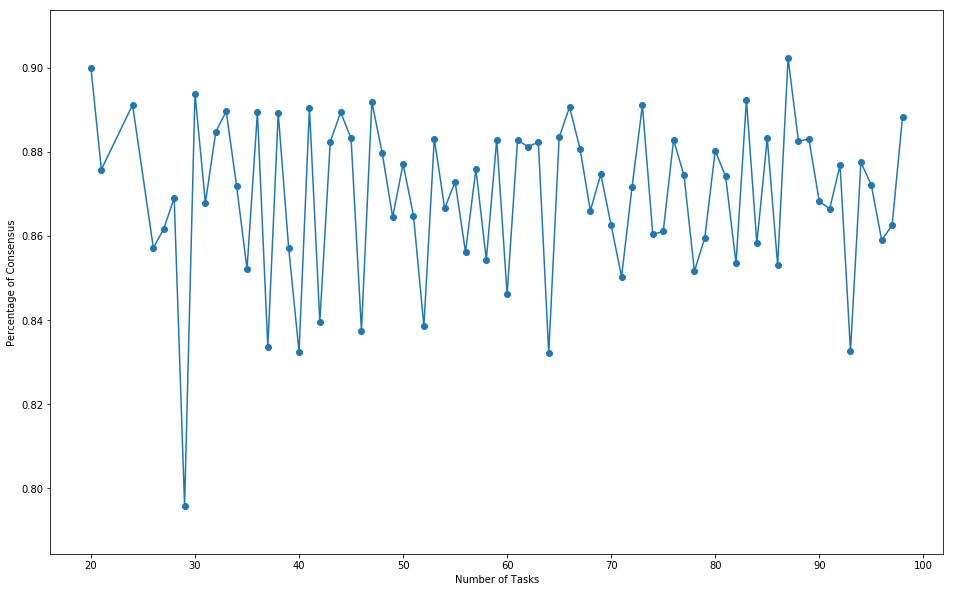

In [13]:
plt.figure(figsize=[16, 10])
plt.scatter(accu.index, accu['accuracy'])
plt.plot(accu.index, accu['accuracy'])
plt.xlabel('Number of Tasks')
plt.ylabel('Percentage of Consensus')
#plt.savefig('100tasks10iter.png')

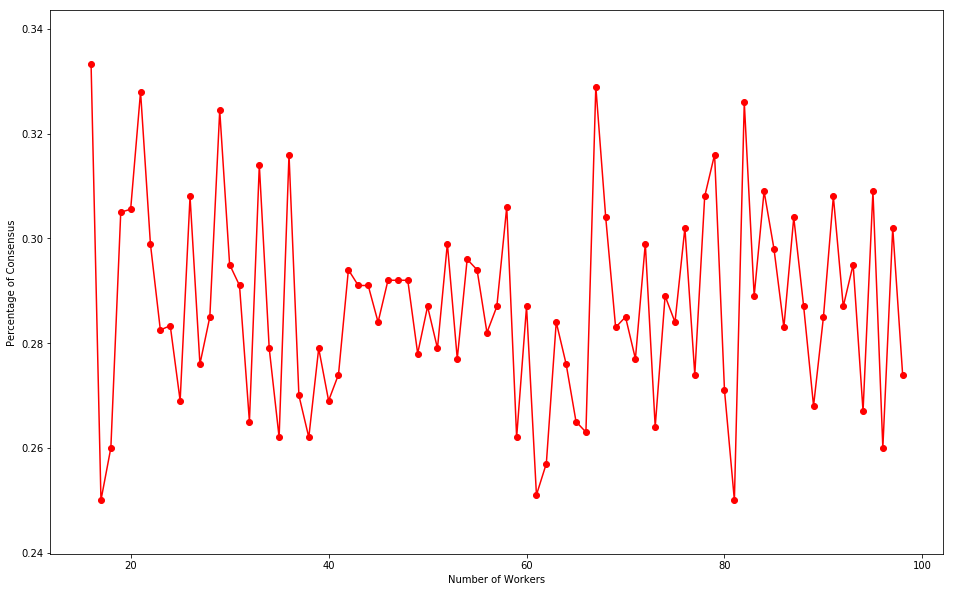

In [40]:
plt.figure(figsize=[16, 10])
plt.scatter(accu.index, accu['accuracy'], color='red')
plt.plot(accu.index, accu['accuracy'], color='red')
plt.xlabel('Number of Workers')
plt.ylabel('Percentage of Consensus')
plt.savefig('100workers10iter.png')

Text(0,0.5,'Percentage of Consensus')

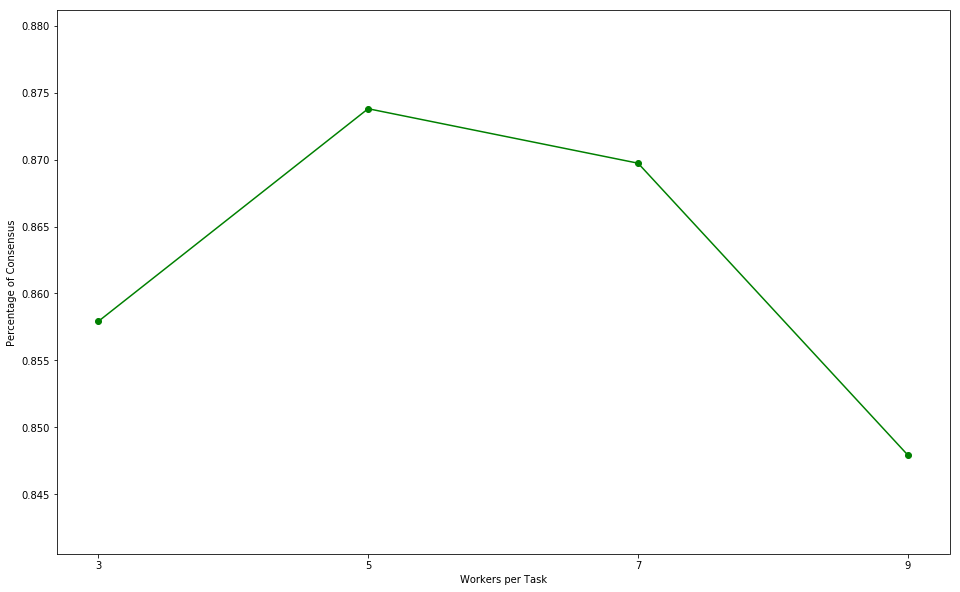

In [6]:
plt.figure(figsize=[16, 10])
plt.scatter(accu.index, accu['accuracy'], color='g')
plt.plot(accu.index, accu['accuracy'], color='g')
plt.xticks(range(len(accu.index)), np.arange(3, 99, 2))
plt.xlabel('Workers per Task')
plt.ylabel('Percentage of Consensus')
#plt.savefig('21wpt10iter.png')

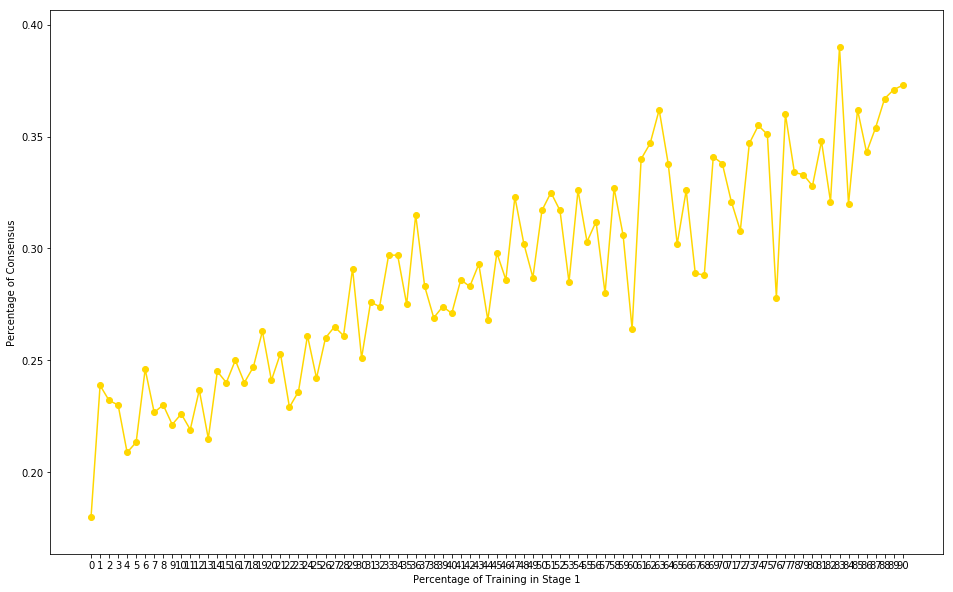

In [90]:
plt.figure(figsize=[16, 10])
plt.scatter(accu.index, accu['accuracy'], color='gold')
plt.plot(accu.index, accu['accuracy'], color='gold')
plt.xticks(range(len(accu.index)), np.arange(0, 100, 1))
plt.xlabel('Percentage of Training in Stage 1')
plt.ylabel('Percentage of Consensus')
plt.savefig('100ptrain10iter.png')